In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers.core import Activation, Dropout

In [2]:
plt.rc('font', family='NanumGothic')
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.

In [3]:
df = pd.read_csv('./sp500.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3969,2020-10-08,3434.280029,3447.280029,3428.149902,3446.830078,3446.830078,3856190000
3970,2020-10-09,3459.669922,3482.340088,3458.070068,3477.139893,3477.139893,3939060000
3971,2020-10-12,3500.020020,3549.850098,3499.610107,3534.219971,3534.219971,3428970000
3972,2020-10-13,3534.010010,3534.010010,3500.860107,3511.929932,3511.929932,3605150000
3973,2020-10-14,3515.469971,3527.939941,3480.550049,3489.070068,3489.070068,1087883110


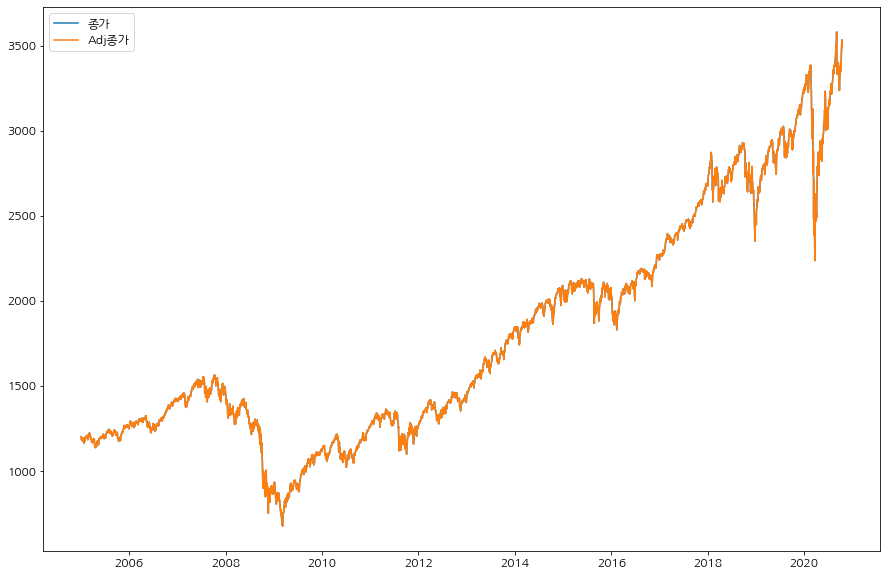

In [4]:
plt.figure(figsize = (15,10))
plt.plot(df['Date'], df['Adj Close'], label='종가')
plt.plot(df['Date'], df['Close'], label='Adj종가')
plt.legend(loc='best')
plt.show()

In [5]:
df.set_index('Date', inplace=True)
df = df['Adj Close']

In [6]:
look_back = 30
forward_days = 14
num_periods = 50

In [7]:
array = df.values.reshape(df.shape[0],1)
array[:5]

array([[1202.079956],
       [1188.050049],
       [1183.73999 ],
       [1187.890015],
       [1186.189941]])

In [8]:
scl = MinMaxScaler()
array = scl.fit_transform(array)
array[:5]

array([[0.18095517],
       [0.17612445],
       [0.17464043],
       [0.17606935],
       [0.17548399]])

In [9]:
print(len(df), len(array))

3974 3974


In [10]:
division = len(array) - num_periods*forward_days
array_test = array[division-look_back:]
array_train = array[:division]

In [11]:
def processData(data, look_back, forward_days,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -forward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back):(i+look_back+forward_days)])
    return np.array(X),np.array(Y)

In [12]:
X_test,y_test = processData(array_test,look_back,forward_days,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

X,y = processData(array_train,look_back,forward_days)
y = np.array([list(a.ravel()) for a in y])

In [13]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20)

In [14]:
X_test

array([[[0.65613169],
        [0.66194723],
        [0.66127583],
        ...,
        [0.68762633],
        [0.69527013],
        [0.70120958]],

       [[0.68293671],
        [0.68435533],
        [0.68392149],
        ...,
        [0.74249646],
        [0.74461742],
        [0.74407001]],

       [[0.69527013],
        [0.70120958],
        [0.70497293],
        ...,
        [0.6690126 ],
        [0.68156289],
        [0.68395243]],

       ...,

       [[0.86188798],
        [0.85004355],
        [0.85852056],
        ...,
        [0.93096812],
        [0.92858539],
        [0.92838575]],

       [[0.87425234],
        [0.88244018],
        [0.87521988],
        ...,
        [0.98134146],
        [1.        ],
        [0.95669194]],

       [[0.92858539],
        [0.92838575],
        [0.93153276],
        ...,
        [0.90866333],
        [0.88158283],
        [0.88491243]]])

In [15]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(2584, 30, 1)
(647, 30, 1)
(50, 30, 1)
(2584, 14)
(647, 14)
(50, 14)


In [16]:
NUM_NEURONS_FirstLayer = 50
NUM_NEURONS_SecondLayer = 30
EPOCHS = 50

model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(look_back, 1)))
model.add(LSTM(32, return_sequences=True,
               input_shape=(look_back, 1)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.1))
model.add(Dense(forward_days))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_validate,y_validate),shuffle=True,batch_size=2, verbose=2)

Epoch 1/50
1292/1292 - 22s - loss: 0.0036 - val_loss: 0.0022
Epoch 2/50
1292/1292 - 20s - loss: 0.0011 - val_loss: 4.5944e-04
Epoch 3/50
1292/1292 - 19s - loss: 7.6770e-04 - val_loss: 3.5285e-04
Epoch 4/50
1292/1292 - 20s - loss: 6.3676e-04 - val_loss: 7.4864e-04
Epoch 5/50
1292/1292 - 21s - loss: 5.0315e-04 - val_loss: 3.7830e-04
Epoch 6/50
1292/1292 - 21s - loss: 4.9830e-04 - val_loss: 2.4251e-04
Epoch 7/50
1292/1292 - 20s - loss: 4.5633e-04 - val_loss: 3.0605e-04
Epoch 8/50
1292/1292 - 20s - loss: 4.1250e-04 - val_loss: 1.7852e-04
Epoch 9/50
1292/1292 - 21s - loss: 3.9424e-04 - val_loss: 2.0454e-04
Epoch 10/50
1292/1292 - 21s - loss: 3.9614e-04 - val_loss: 1.8720e-04
Epoch 11/50
1292/1292 - 20s - loss: 4.0056e-04 - val_loss: 1.6307e-04
Epoch 12/50
1292/1292 - 19s - loss: 3.6423e-04 - val_loss: 1.9289e-04
Epoch 13/50
1292/1292 - 20s - loss: 3.6258e-04 - val_loss: 2.2026e-04
Epoch 14/50
1292/1292 - 20s - loss: 3.4471e-04 - val_loss: 1.8521e-04
Epoch 15/50
1292/1292 - 18s - loss: 3.505

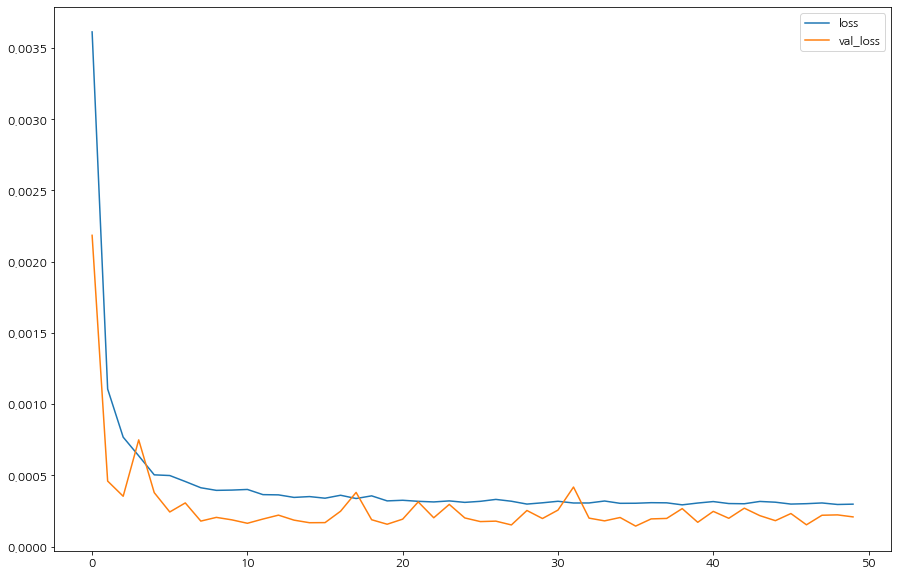

In [17]:
plt.figure(figsize = (15,10))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

In [18]:
Xt = model.predict(X_test)

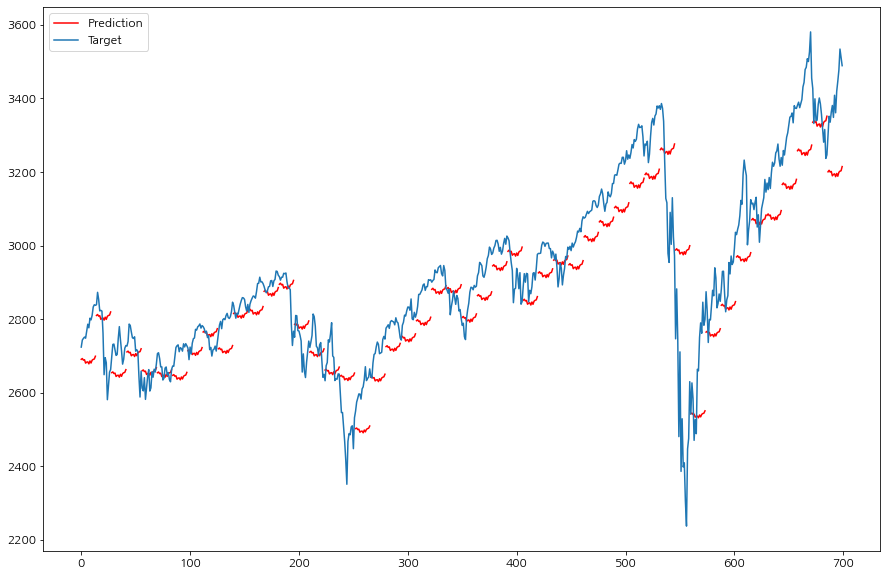

In [19]:
plt.figure(figsize = (15,10))

for i in range(0,len(Xt)):
    plt.plot([x + i*forward_days for x in range(len(Xt[i]))], scl.inverse_transform(Xt[i].reshape(-1,1)), color='r')
    
plt.plot(0, scl.inverse_transform(Xt[i].reshape(-1,1))[0], color='r', label='Prediction')
    
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label='Target')
plt.legend(loc='best')
plt.show()